['car.jpg', 'car1.jpg', 'car4.jpg', 'car3.jpg', 'car2.jpg']
car.jpg
437
Porcentaje de recort 
65
Original


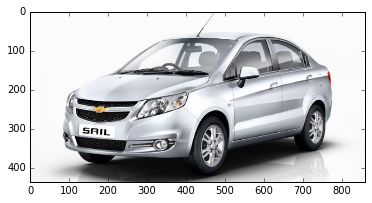

Recortada
372


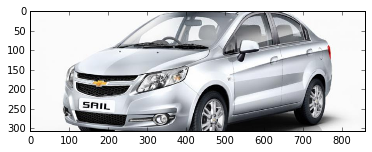

car1.jpg
437
Porcentaje de recort 
65
Original


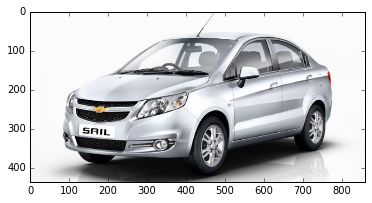

Recortada
372


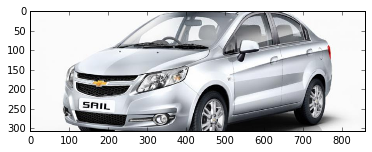

car4.jpg
437
Porcentaje de recort 
65
Original


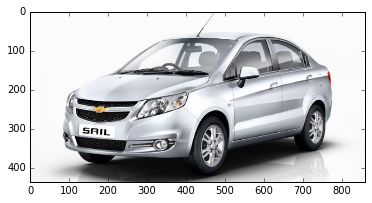

Recortada
372


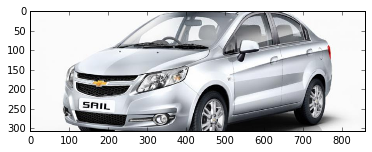

car3.jpg
437
Porcentaje de recort 
65
Original


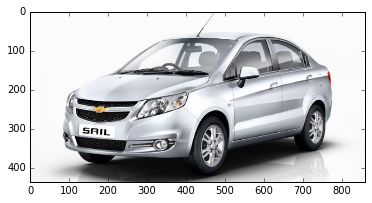

Recortada
372


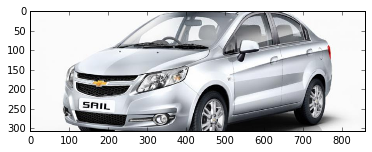

car2.jpg
437
Porcentaje de recort 
65
Original


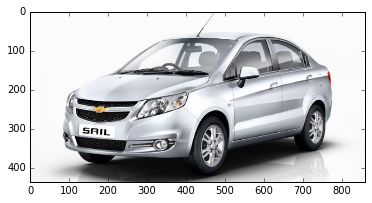

Recortada
372


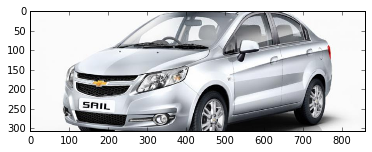

In [82]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
di='/home/fredy/Desktop/image'
# First, load the image again
dir_path = os.listdir(di)
porcent_recort=30

print(dir_path)


for f in dir_path:
    print(f)  
    raw_image_data = mpimg.imread(di+'/'+f,"")
    image = tf.placeholder("float", [None, None, None])
    #slice(entrada,inicio,tamaño,name=None)
    r = tf.slice(image,[0,0,0],[-1,-1,1])
    g = tf.slice(image,[0,0,1],[-1,-1,1])
    b = tf.slice(image,[0,0,2],[-1,-1,1])
   
    #height, width, channels = 
    height, width, channels = np.array(raw_image_data).shape
    
    #Se obtiene la cantidad donde se comenzara a la imagen 10%
    result_porcent=(height*porcent_recort)/100
    
    init_record = result_porcent/2
    
    #Se obtiene la cantidad donde terminara la imagen 10% de abajo
    find_record = height-init_record
    print(height)
    #r = tf.scalar_mul(0.2126,r)
    #g = tf.scalar_mul(0.7152,g)
    #b = tf.scalar_mul(0.0722,b)
    grey = tf.add(r,tf.add(g,b))

    #concat(valores,eje,name='concat{})
    #out = tf.concat(2, [r,g,b])
    #out = tf.concat(2, [grey,grey, grey])
    out = tf.concat([r,g,b],2)
    out = tf.cast(out, tf.uint8)
    image_recort = tf.slice(out, [0, 0, 0], [find_record, -1, -1])
    image_recort2 = tf.slice(out, [init_record, 0, 0], [-1, -1, -1])
    
    with tf.Session() as session:
        print("Porcentaje de recort ")
        print(init_record)    
        print("Original")
        result = session.run(out , feed_dict={image: raw_image_data})
        plt.imshow(result)
        plt.show()
        print("Recortada")
        print(find_record)
        result = session.run(image_recort , feed_dict={image: raw_image_data})
        result2 = session.run(image_recort2 , feed_dict={image: result})
        plt.imshow(result2)
        plt.show()
       
        
    